INTRODUCTION

Here we have a dataset of the results of a recent employee survey. Goal is to analyze the data to come up with ideas for how to increase employee retention. To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their department, number of projects, average monthly hours, and any other data points you deem helpful.

Importing libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

DATA COLLECTION

Data collection is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.

In [10]:
data = pd.read_csv('C:\\Users\\soura\\Documents\\DS_ML_assignments\\HR_capstone_dataset.csv')
data.head()

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_performance_rating   14999 non-null  float64
 2   number_of_projects        14999 non-null  int64  
 3   avg_monthly_hours         14999 non-null  int64  
 4   years_at_company          14999 non-null  int64  
 5   had_work_accident         14999 non-null  int64  
 6   has_left_company          14999 non-null  int64  
 7   promoted_in_last_5_years  14999 non-null  int64  
 8   Department                14999 non-null  object 
 9   salary_level              14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(14999, 10)

In [14]:
data.isnull().sum()

satisfaction_level          0
last_performance_rating     0
number_of_projects          0
avg_monthly_hours           0
years_at_company            0
had_work_accident           0
has_left_company            0
promoted_in_last_5_years    0
Department                  0
salary_level                0
dtype: int64

DATA VISULIZATION

<Axes: ylabel='Frequency'>

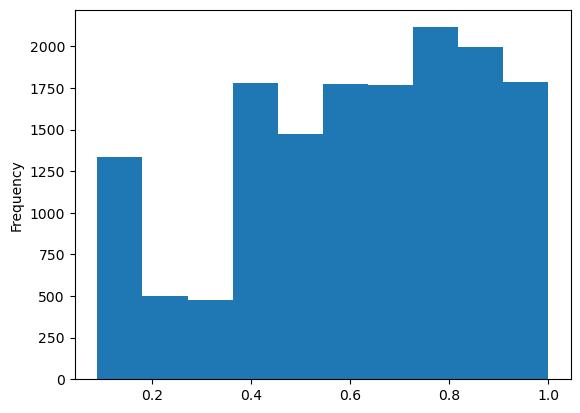

In [17]:
data['satisfaction_level'].plot.hist()

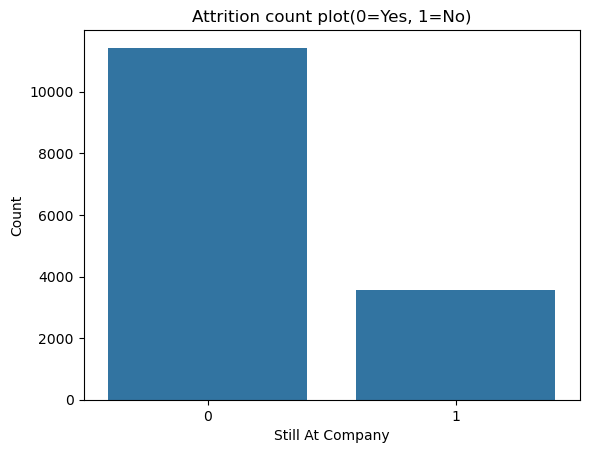

In [19]:

sns.countplot(data=data, x="has_left_company")
#Adding the labels and title

plt.xlabel("Still At Company")
plt.ylabel("Count")
plt.title("Attrition count plot(0=Yes, 1=No)")

plt.show()

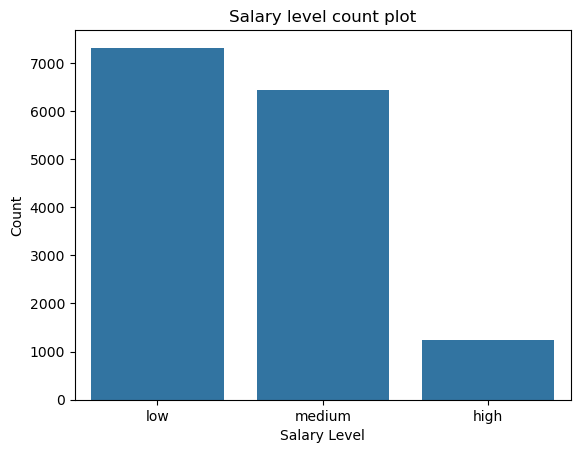

In [21]:
sns.countplot(data=data, x="salary_level")
#Adding the labels and title

plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.title("Salary level count plot")

plt.show()

C:\Users\soura\AppData\Local\Temp\ipykernel_17176\617170143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Department", y="Count", palette="bright")


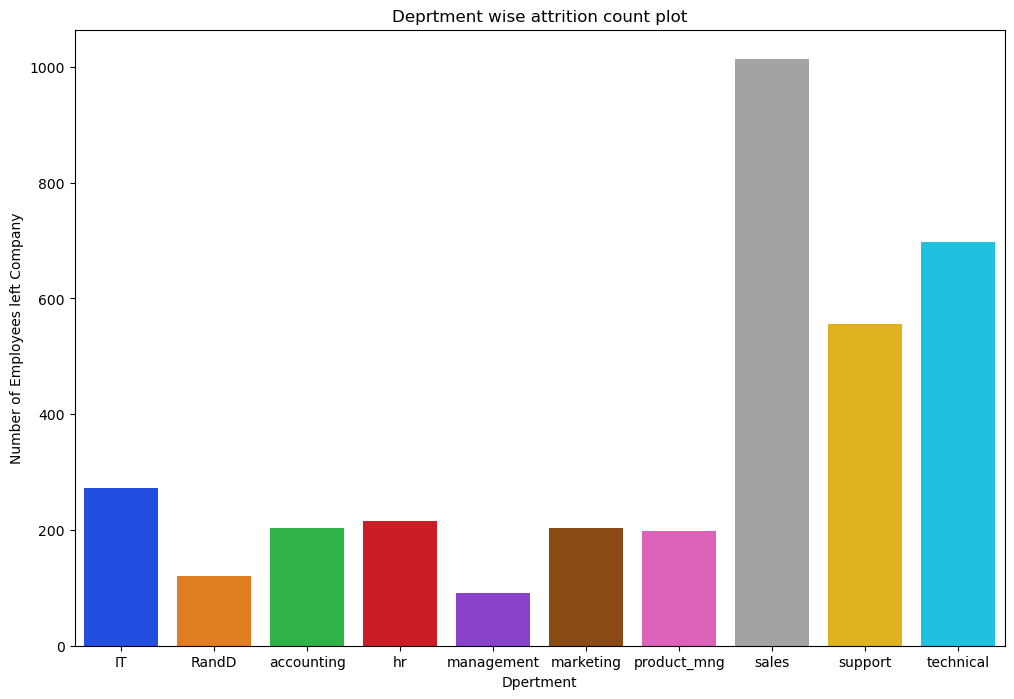

In [23]:
df=data[data["has_left_company"] == 1].groupby("Department").size().reset_index(name="Count")
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="Department", y="Count", palette="bright")
#Adding the labels and title
plt.xlabel("Dpertment")
plt.ylabel("Number of Employees left Company")
plt.title("Deprtment wise attrition count plot")

plt.show()

C:\Users\soura\AppData\Local\Temp\ipykernel_17176\4213610054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Department", y="years_at_company", palette="bright")


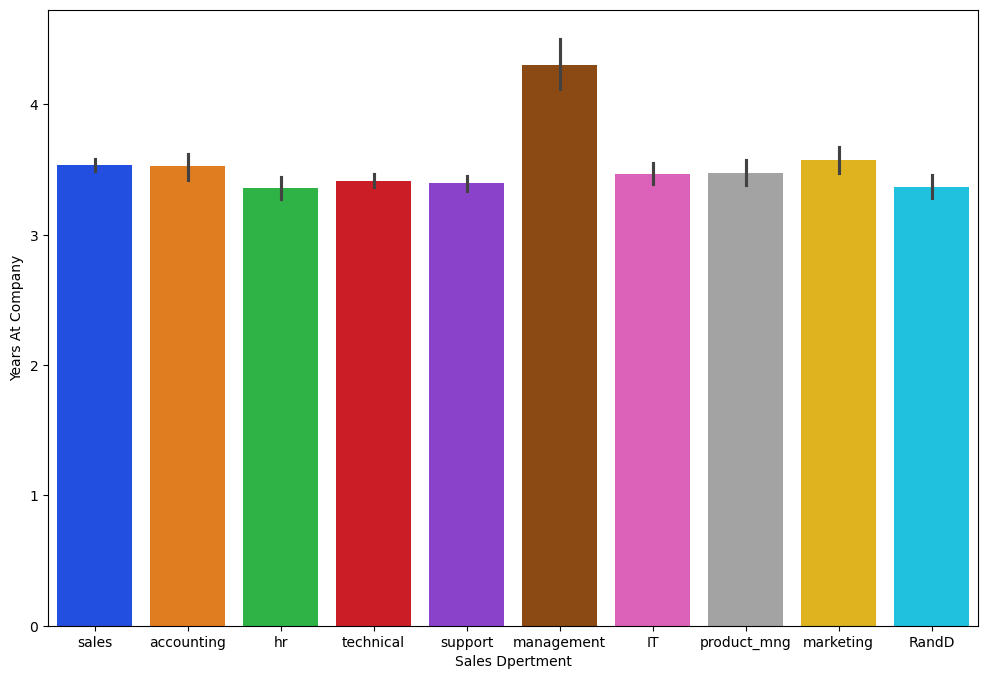

In [25]:
#df1=data[data["Department"] == "sales"]

plt.figure(figsize=(12, 8))
sns.barplot(data=data, x="Department", y="years_at_company", palette="bright")
#Adding the labels and title
plt.xlabel("Sales Dpertment")
plt.ylabel("Years At Company")

plt.show()

In [80]:
from ydata_profiling import ProfileReport

# Create a profiling report
profile = ProfileReport(data, title="Profiling Report")

# Save the report as an HTML file
profile.to_file("HR_data_analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

DATA CLEANING

In [28]:
data.dropna(inplace=True) 
data.shape

(14999, 10)

We do not have any null data, so post cleaning shape is same. Total 14999 records.

In [49]:
data.head()

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level,sal_high,sal_low,sal_medium
0,0.38,0.53,2,157,3,0,1,0,7,1,False,True,False
1,0.80,0.86,5,262,6,0,1,0,7,2,False,False,True
2,0.11,0.88,7,272,4,0,1,0,7,2,False,False,True
3,0.72,0.87,5,223,5,0,1,0,7,1,False,True,False
4,0.37,0.52,2,159,3,0,1,0,7,1,False,True,False


In [55]:
#import label encoder
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()

data["salary_level"]=label_encoder.fit_transform(data['salary_level'])
data["Department"]=label_encoder.fit_transform(data['Department'])
data.drop(['sal_high', 'sal_low', 'sal_medium'], axis=1, inplace=True)
data.head()

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


FEATURE SELECTION

In [58]:
X=data.drop('has_left_company',axis=1)
y=data['has_left_company'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

DIVIDING DATASET IN 70, 30 RATIO, 70% IS TRAIN DATA AND 30% IS TEST DATA

TRAINING AND TESTING DATA

Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [66]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.7675555555555555


C:\Users\soura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DECISION TREE CLASSIFIER

A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [69]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_cm
dtree_ac=accuracy_score(dtree_pred,y_test)
dtree_ac

0.9742222222222222

SVM REGRESSOR

As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM

In [72]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)
print('SVM_regressor_accuracy:',svr_ac)

SVM_regressor_accuracy: 0.7904444444444444


RANDOM FORREST

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [75]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
print('RandomForest_accuracy:',rdf_ac)

RandomForest_accuracy: 0.9886666666666667


MODELS COMPARISION THE KEY TO A FAIR COMPARISON OF MACHINE LEARNING ALGORITHMS IS ENSURING THAT EACH ALGORITHM IS EVALUATED IN THE SAME WAY ON THE SAME DATA. YOU CAN ACHIEVE THIS BY FORCING EACH ALGORITHM TO BE EVALUATED ON A CONSISTENT TEST HARNESS. IN THIS NOTEBBOK 4 DIFFERENT ALGORITHMS ARE COMPARED

Text(0.5, 1.0, 'Model Accuracy')

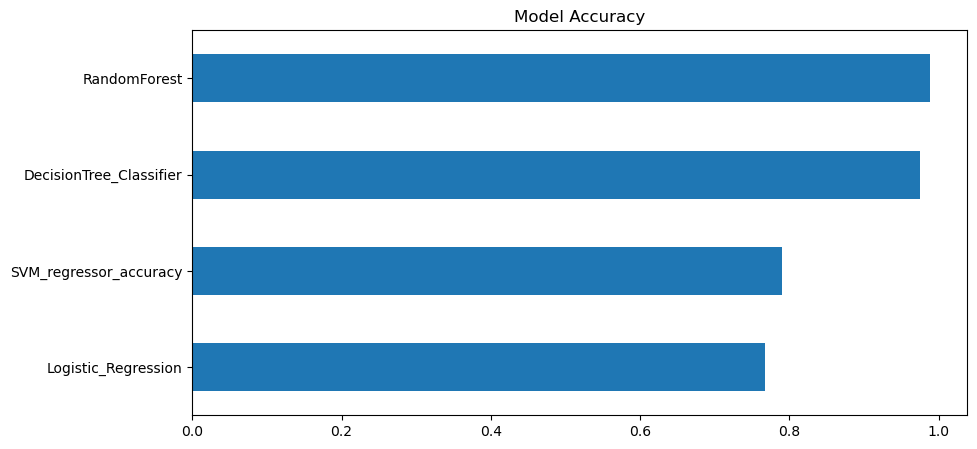

In [78]:
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

In this notebook we use pandas, NumPy, yData profiling for data pre-processing and for visualization we use matplotlib, seaborn and mostly plotly.

By working on the Employee survey data, we could find insights about the employee mentality and trend for leaving the company. Here we use different machine learning model to predict the attrition behaviour and also compare the model performance.
